# Εργασία 6- Data Engineering

Ευθυμιάδης Κωνσταντίνος<br>
ΑΕΜ: 240

## Εισαγωγή Βιβλιοθηκών

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

!pip install ydata-profiling
from ydata_profiling import ProfileReport

import umap

## Πρώτο Ερώτημα

### Εισαγωγή Δεδομένων

In [2]:
df= pd.read_csv("bankloan.csv")
df

,Row ID,id,member_id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,...,application_type,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
0,1.0,60516983,64537751,20000,20000,36 months,12.29,667.06,C,C1,...,INDIVIDUAL,NaN,NaN,0,0,52303,41000,NaN,1.0,0.0
1,2.0,60187139,64163931,11000,11000,36 months,12.69,369.00,C,C2,...,INDIVIDUAL,NaN,NaN,0,332,175731,13100,NaN,1.0,0.0
2,3.0,60356453,64333218,7000,7000,36 months,9.99,225.84,B,B3,...,INDIVIDUAL,NaN,NaN,0,0,202012,16300,NaN,1.0,0.0
3,4.0,59955769,63900496,10000,10000,36 months,10.99,327.34,B,B4,...,INDIVIDUAL,NaN,NaN,0,0,108235,34750,NaN,1.0,0.0
4,5.0,58703693,62544456,9550,9550,36 months,19.99,354.87,E,E4,...,INDIVIDUAL,NaN,NaN,0,0,45492,14100,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212994,NaN,54067695,57608436,20000,20000,36 months,13.33,677.07,C,C3,...,INDIVIDUAL,NaN,NaN,0,574,21474,5400,NaN,NaN,NaN
212995,NaN,54414443,57995197,6000,6000,36 months,11.53,197.95,B,B5,...,INDIVIDUAL,NaN,NaN,0,0,2176,4200,NaN,NaN,NaN
212996,NaN,54474829,58055589,18000,18000,60 months,19.19,468.82,E,E3,...,INDIVIDUAL,NaN,NaN,0,4404,8414,15300,NaN,NaN,NaN
212997,NaN,54354054,57934790,7050,7050,36 months,15.61,246.51,D,D1,...,INDIVIDUAL,NaN,NaN,0,0,159660,26800,NaN,NaN,NaN


### Περιγραφή Χαρακτηριστικών

In [3]:
df.describe()

,Row ID,id,member_id,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,...,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,Unnamed: 50,36months,60months
count,368.000000,2.129990e+05,2.129990e+05,212999.000000,212999.000000,212999.000000,212999.000000,2.129990e+05,212999.000000,212999.000000,...,62365.000000,441.000000,439.000000,212999.000000,212999.000000,2.129990e+05,2.129990e+05,0.0,511.000000,511.000000
mean,184.500000,6.103515e+07,6.515927e+07,15257.965530,15257.965530,12.401658,440.842921,7.780071e+04,19.360817,0.347462,...,45.468356,107574.096327,18.320114,0.005718,261.951652,1.416537e+05,3.444425e+04,NaN,0.622309,0.377691
std,106.376689,4.734904e+06,5.215173e+06,8611.713377,8611.713377,4.249365,245.858646,8.188065e+04,31.925871,0.921209,...,22.645675,47921.057382,7.230012,0.081045,2215.188372,1.568766e+05,3.531827e+04,NaN,0.485285,0.485285
min,1.000000,5.670500e+04,7.082500e+04,1000.000000,1000.000000,5.320000,30.120000,0.000000e+00,0.000000,0.000000,...,0.000000,17950.000000,3.050000,0.000000,0.000000,0.000000e+00,0.000000e+00,NaN,0.000000,0.000000
25%,92.750000,5.783411e+07,6.158651e+07,8500.000000,8500.000000,9.170000,262.230000,4.700000e+04,12.660000,0.000000,...,28.000000,75001.000000,13.185000,0.000000,0.000000,3.143300e+04,1.460000e+04,NaN,0.000000,0.000000
50%,184.500000,6.137900e+07,6.549753e+07,14000.000000,14000.000000,12.290000,382.870000,6.500000e+04,18.720000,0.000000,...,45.000000,100000.000000,17.750000,0.000000,0.000000,8.138600e+04,2.510000e+04,NaN,1.000000,0.000000
75%,276.250000,6.503778e+07,6.956436e+07,20000.000000,20000.000000,14.650000,578.790000,9.250000e+04,25.520000,0.000000,...,63.000000,131000.000000,22.650000,0.000000,0.000000,2.097080e+05,4.260000e+04,NaN,1.000000,1.000000
max,368.000000,6.861687e+07,7.351969e+07,35000.000000,35000.000000,28.990000,1445.460000,9.000000e+06,9999.000000,30.000000,...,171.000000,410000.000000,43.860000,5.000000,380757.000000,4.127799e+06,1.641300e+06,NaN,1.000000,1.000000


### Περιγραφή Χαρακτηριστικών με ydata-profiling

In [4]:
profile = ProfileReport(df, title="Profiling Report")
# profile

In [5]:
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 53/53 [00:43<00:00,  1.22it/s]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Δεύτερο Ερώτημα

Σύμφωνα με το profiling dashboard, για την μεταβλητή loan_amnt έχουμε:<br>
<ul>
<li> Μέγιστη Τιμή: 35000 </li>
<li> Ελάχιστη Τιμή: 1000 </li>
<li> Μέση Τιμή: 15257.966 </li>
</ul>

Για την εκπαίδευση του μοντέλου μπορούμε να αφαιρέσουμε τις παρακάτω μεταβλητές:<br>

1. **Row ID** -> Έχει 99.6% missing values (δεν παρέχει και κάποια ουσιαστική πληροφορία)
2. **ID** -> Έχει 100% μοναδικές τιμές (λογικό αφού είναι unique). Δεν μεταφέρει κάποια πληροφορία, με αποτέλεσμα να δημιουργήσει θόρυβο στο μοντέλο
3. **member_id** -> Έχει 100% μοναδικές τιμές (αντίστοιχο με το ID)
4. **total_rec_late_fee** -> Το 99.8% αποτελείται από τιμές ίσες με 0, με αποτέλεσμα να μην παρέχει κάποια ουσιαστική πληροφορία
5. **recoveries** -> Το 99.7% αποτελείται από τιμές ίσες με 0, με αποτέλεσμα να μην παρέχει κάποια ουσιαστική πληροφορία
6. **collection_recovery_fee** -> Το 99.7% αποτελείται από τιμές ίσες με 0, με αποτέλεσμα να μην παρέχει κάποια ουσιαστική πληροφορία
7. **collections_12_mths_ex_med** -> Το 98% αποτελείται από τιμές ίσες με 0, με αποτέλεσμα να μην παρέχει κάποια ουσιαστική πληροφορία
8. **mths_since_last_major_derog** -> Έχει 70.6% missing values
9. **annual_inc_joint** -> Έχει 99.5% missing values
10. **dti_joint** -> Έχει 99.5% missing values
11. **Unnamed: 50** -> Έχει 100% missing values
12. **36months** -> Έχει 99.4% missing values
13. **60months** -> Έχει 99.4% missing values
14. **mths_since_last_delinq** -> Έχει 48.3% missing values και δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο
15. **delinq_2yrs** -> Αποτελείται από 79.5% από μηδενικά
16. **emp_title** -> Categorical μεταβλητή με πάρα πολλές διαφορετικές τιμές, δεν είναι πολύ σημαντική
17. **title** -> Παρέχει επεξήγηση και όχι ουσιαστική πληροφορία. (εξηγεί την μεταβλητή purpose)
18. **next_pymnt_d** -> Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο
19. **last_pymnt_amnt** -> Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο
20. **last_pymnt_d** -> Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο
21. **earliest_cr_line** -> Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο
22. **issue_d** -> Αναφέρει τον μήνα που λήφθηκε το δάνειο. Δεν παρέχει κάποια σηματική πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο
23. **out_prncp** -> Είναι το υπόλοιπο δανείου, οπότε αναφέρεται σε ήδη κάποιο δάνεια. Δεν είναι χρήσιμο για την λήψη απόφασης για κάποιο δάνειο
24. **total_pymnt** -> Δείχνει τις συνολικές πληρωμές. Αποτελεί πληροφορία για μετά την λήψη του δανείου
25. **last_credit_pull_d** -> Πληροφορία για μετά τ ην λήψη του δανείου. Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο
26. **grade** -> Η πληροφορία του grade επικαλύπτεται από την πληροφορία του sub_grade
27. **funded_amnt** -> Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο. Δείχνει το ποσό που εγκρίθηκε, η πληροφορίατου επικαλύπτεται από το loan_amnt
28. **loan_status** -> Αναφέρεται στην κατάσταση του δανείου αφού όμως έχει χορηγηθεί. Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο.
29. **total_rec_prncp** -> Δείχνει πόσα χρήματα έχουν ήδη πληρωθεί. Επομένως, δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο.
30. **total_rec_int** -> Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο. Δείχνει τους τόκους που εισπράχθηκαν μέχρι στιγμής, άρα είναι πληροφορία για μετά το δάνειο
31. **int_rate** -> Δεν παρέχει κάποια πληροφορία για το αν πρέπει κάποιος να πάρει δάνειο. Δείχνει το επιτόκιο του δανείου που χορηγήθηκε.

### Διαγραφή μεταβλητών που δεν χρειάζονται

In [6]:
cols_to_drop = [
    "Row ID",
    "id",
    "member_id",
    "total_rec_late_fee",
    "recoveries",
    "collection_recovery_fee",
    "collections_12_mths_ex_med",
    "mths_since_last_major_derog",
    "annual_inc_joint",
    "dti_joint",
    "Unnamed: 50",
    "36months",
    "60months",
    "mths_since_last_delinq",
    "delinq_2yrs",
    "emp_title",
    "title",
    "next_pymnt_d",
    "last_pymnt_amnt",
    "last_pymnt_d",
    "earliest_cr_line",
    "issue_d",
    "out_prncp",
    "total_pymnt",
    "last_credit_pull_d",
    "grade",
    "funded_amnt",
    "loan_status",
    "total_rec_prncp",
    "total_rec_int",
    "int_rate"
]

df = df.drop(columns=cols_to_drop)

In [7]:
df.columns, df.shape

(Index(['loan_amnt', 'term', 'installment', 'sub_grade', 'emp_length',
        'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti',
        'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
        'total_acc', 'initial_list_status', 'application_type',
        'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
       dtype='object'),
 (212999, 22))

In [8]:
profile= ProfileReport(df, title="Profiling Report")
profile.to_file("report2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 22/22 [00:06<00:00,  3.48it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### Μετατροπή των Categorical Variables σε Numerical Variables

#### Εύρεση όλων των categorical Variables του df

In [9]:
df.select_dtypes(include=['object', 'category'])

,term,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
0,36 months,C1,1 year,OWN,Source Verified,debt_consolidation,w,INDIVIDUAL
1,36 months,C2,7 years,MORTGAGE,Source Verified,debt_consolidation,w,INDIVIDUAL
2,36 months,B3,6 years,MORTGAGE,Source Verified,debt_consolidation,f,INDIVIDUAL
3,36 months,B4,10+ years,MORTGAGE,Source Verified,credit_card,f,INDIVIDUAL
4,36 months,E4,NaN,RENT,Verified,debt_consolidation,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...
212994,36 months,C3,5 years,RENT,Source Verified,debt_consolidation,w,INDIVIDUAL
212995,36 months,B5,10+ years,RENT,Not Verified,credit_card,w,INDIVIDUAL
212996,60 months,E3,< 1 year,RENT,Source Verified,debt_consolidation,w,INDIVIDUAL
212997,36 months,D1,NaN,MORTGAGE,Verified,other,w,INDIVIDUAL


#### Μεταβλητή term

Η μεταβλητή term λαμβάνει μόνο δύο τιμές: 36 months και 60 months. Μπορούμε να την αντικαταστήσουμε και αντί για αυτήν να έχουμε μια στήλη 'term_ 60 months', που θα λαμβάνει τιμή 1 ή 0.

In [10]:
df = pd.get_dummies(df, columns=['term'], drop_first=True)

#### Μεταβλητή emp_length

In [11]:
dictionary_with_years = {
    '< 1 year': 0,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10,
}
df['emp_length'].replace(dictionary_with_years, inplace=True)
df['emp_length'] = df['emp_length'].astype(float)

/tmp/ipython-input-3166191930.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['emp_length'].replace(dictionary_with_years, inplace=True)


#### Μεταβλητή home_ownership

Η μεταβλητή home_ownership λαμβάνει 4 τιμές. Αντίστοιχα με one-hot_encoding, φτιάχνονται 3 νέες στήλες (αντί για 4 για να αποφευχθεί το multicollinearity)

In [12]:
df = pd.get_dummies(df, columns=['home_ownership'], drop_first=True)

#### Μεταβλητή verification_status

Η μεταβλητή verification_status λαμβάνει 3 τιμές. Αντίστοιχα με one-hot_encoding, φτιάχνονται 2 νέες στήλες (αντί για 3 για να αποφευχθεί το multicollinearity)

In [13]:
df = pd.get_dummies(df, columns=['verification_status'], drop_first=True)

#### Ματαβλητή purpose

Η μεταβλητή purpose λαμβάνει 13 διαφορετικές τιμές. Αντίστοιχα με one-hot_encoding, φτιάχνονται 12 νέες στήλες (αντί για 13 για να αποφευχθεί το multicollinearity)

In [14]:
df = pd.get_dummies(df, columns=['purpose'], drop_first=True)

#### Μεταβλητή initial_list_status

Η μεταβλητή initial_list_status λαμβάνει 2 διαφορετικές τιμές. Αντίστοιχα με one-hot_encoding, φτιάχνονται 1 νέα στήλη (αντί για 2 για να αποφευχθεί το multicollinearity)

In [15]:
df = pd.get_dummies(df, columns=['initial_list_status'], drop_first=True)

#### Μεταβλητή application_type

Η μεταβλητή application_type λαμβάνει 2 διαφορετικές τιμές. Αντίστοιχα με one-hot_encoding, φτιάχνονται 1 νέα στήλη (αντί για 2 για να αποφευχθεί το multicollinearity)

In [16]:
df = pd.get_dummies(df, columns=['application_type'], drop_first=True)

#### Έλεγχος για Categorical Variables

In [17]:
df.select_dtypes(include=['object', 'category'])

,sub_grade
0,C1
1,C2
2,B3
3,B4
4,E4
...,...
212994,C3
212995,B5
212996,E3
212997,D1


#### Διαχείριση missing values για emp_length και revol_util

#### Χρησιμοποίηση knn για την στήλη emp_length

In [18]:
col_to_fill = ['emp_length']

num_cols = df.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in num_cols if col not in ["emp_length", "revol_util"]]

impute_df = df[feature_cols + col_to_fill]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(impute_df)

df['emp_length'] = imputed_array[:, -1]

#### Χρησιμοποίηση knn για την στήλη revol_util

In [19]:
col_to_fill = ['revol_util']

num_cols = df.select_dtypes(include='number').columns.tolist()
feature_cols = [col for col in num_cols if col not in col_to_fill]

impute_df = df[feature_cols + col_to_fill]

knn_imputer = KNNImputer(n_neighbors=5)
imputed_array = knn_imputer.fit_transform(impute_df)

df['revol_util'] = imputed_array[:, -1]

#### Έλεγχος για missing values

In [20]:
df.isna().sum()[df.isna().sum() > 0]

,0


### Χορήγηση Δανείων στα άτομα με grade A, B1 και B2

In [21]:
is_A = df['sub_grade'].str.startswith('A')
is_B1_or_B2 = df['sub_grade'].isin(['B1', 'B2'])

df['target'] = (is_A | is_B1_or_B2).astype(int)

In [22]:
df[['sub_grade', 'target']].head(20)

,sub_grade,target
0,C1,0
1,C2,0
2,B3,0
3,B4,0
4,E4,0
5,C5,0
6,B4,0
7,D4,0
8,C2,0
9,E1,0


#### Πλέον η μεταβλητή sub_grade δεν χρειάζεται

In [23]:
df = df.drop(columns=['sub_grade'])

#### Προβολή bar plot για τα χορηγούμενα δάνεια

<Axes: xlabel='target'>

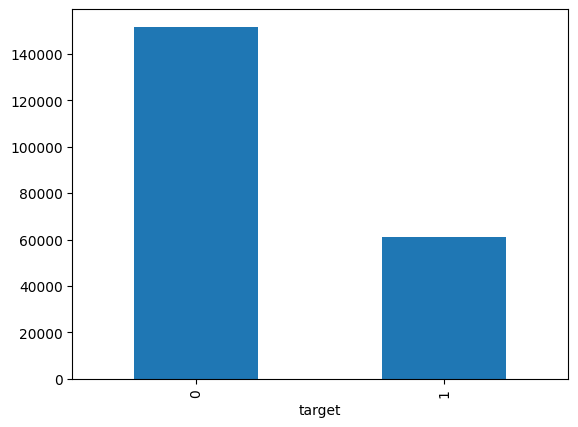

In [24]:
df.target.value_counts().plot(kind='bar')

### Εύρεση εύρους ποσού το οποίο γίνεται δεκτό για δανειοδότηση με πιθανότητα τουλάχιστον 15%

In [25]:
step = 10000

min_loan_amnt = df['loan_amnt'].min()
max_loan_amnt = df['loan_amnt'].max()

bins = np.arange(min_loan_amnt, max_loan_amnt + step, step)

df['loan_bin'] = pd.cut(df['loan_amnt'], bins=bins, right=False)
results = df.groupby('loan_bin')['target'].mean().reset_index()

result_ranges = results[results['target'] >= 0.15]

result_ranges

/tmp/ipython-input-2562420643.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  results = df.groupby('loan_bin')['target'].mean().reset_index()


,loan_bin,target
0,"[1000, 11000)",0.313419
1,"[11000, 21000)",0.289135
2,"[21000, 31000)",0.285045


In [26]:
df= df.drop(columns=['loan_bin'])

## Τρίτο Ερώτημα

Ο Classifier που επιλέχθηκε είναι ο DecisionTreeClassifier, καθώς προσφέρει μεγάλη επεξηγησιμότητα, κάτι πολύ σημαντικό για την περίπτωση μιας τράπεζας

### Διαχωρισμός των Δεδομένων

In [27]:

df_features= df.drop(columns=['target'])
df_target= df['target']

x= df_features.to_numpy()
y= df_target.to_numpy()

seed= 0
test_size= 0.3

x_train, x_test, y_train, y_test= train_test_split(
    x, y, test_size= test_size, random_state= seed, stratify= y
    )

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149099, 35), (149099,), (63900, 35), (63900,))

### Εύρεση κατάλληλων παραμέτρων για το Decision Tree

In [28]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5, 10]
}

grid = GridSearchCV(DecisionTreeClassifier(random_state= seed), param_grid, cv=5, n_jobs= -1)
grid.fit(x_train, y_train)

print("Best parameters:", grid.best_params_)

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}


### Προβολή Μετρικών για το καλύτερο μοντέλου του validation set

In [29]:
y_pred= grid.best_estimator_.predict(x_test)

accuracy_of_best_estimator= accuracy_score(y_test, y_pred)
precision_of_best_estimator= precision_score(y_test, y_pred)
recall_of_best_estimator= recall_score(y_test, y_pred)
f1_of_best_estimator= f1_score(y_test, y_pred)

print("Accuracy of best estimator: ", accuracy_of_best_estimator)
print("Precision of best estimator: ", precision_of_best_estimator)
print("Recall of best estimator: ", recall_of_best_estimator)
print("f1 of best estimator: ", f1_of_best_estimator)

Accuracy of best estimator:  0.8218622848200313
Precision of best estimator:  0.712011139363119
Recall of best estimator:  0.6396366998422799
f1 of best estimator:  0.6738862627130784


Στο συγκεκριμένο σενάριο, επιθυμούμαι να έχουμε υψηλό recall. Υπάρχει μεγαλύτερος κίνδυνος να δεχτούμε κάποιον υποψήφιο που έχει υψηλό κίνδυνο να μην αποπληρώσει το δάνειο, από το να απορρίψουμε κάποιον που θα το πλήρωνε κανονικά

## Τέταρτο Ερώτημα

### Εκπαίδευση Ταξινομητή Random Forest

In [30]:
df_features= df.drop(columns=['target'])
df_target= df['target']

x= df_features.to_numpy()
y= df_target.to_numpy()

seed= 0
test_size= 0.3

x_train, x_test, y_train, y_test= train_test_split(
    x, y, test_size= test_size, random_state= seed, stratify= y
    )

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149099, 35), (149099,), (63900, 35), (63900,))

In [31]:
random_forest_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

random_forest_clf.fit(x_train, y_train)

y_pred= random_forest_clf.predict(x_test)

accuracy_of_random_forest= accuracy_score(y_test, y_pred)
precision_of_random_forest= precision_score(y_test, y_pred)
recall_of_random_forest= recall_score(y_test, y_pred)
f1_of_random_forest= f1_score(y_test, y_pred)

print("Accuracy of best estimator: ", accuracy_of_random_forest)
print("Precision of best estimator: ", precision_of_random_forest)
print("Recall of best estimator: ", recall_of_random_forest)
print("f1 of best estimator: ", f1_of_random_forest)

Accuracy of best estimator:  0.8515336463223787
Precision of best estimator:  0.8055059728134011
Recall of best estimator:  0.63811388480992
f1 of best estimator:  0.7121051194124965


### 15 Σημαντικότερα Χαρακτηριστικά

In [32]:
importances= random_forest_clf.feature_importances_

feature_importances= pd.DataFrame({
    'feature': df_features.columns,
    'importance': importances
})

feature_importances= feature_importances.sort_values(by="importance", ascending= False)
top15= feature_importances.head(15)
top15

,feature,importance
1,installment,0.104229
15,term_ 60 months,0.097800
14,total_rev_hi_lim,0.094453
9,revol_util,0.085125
0,loan_amnt,0.073265
4,dti,0.071353
3,annual_inc,0.065064
8,revol_bal,0.061744
13,tot_cur_bal,0.057798
10,total_acc,0.046346


### Εμφάνιση Correlation Matrix

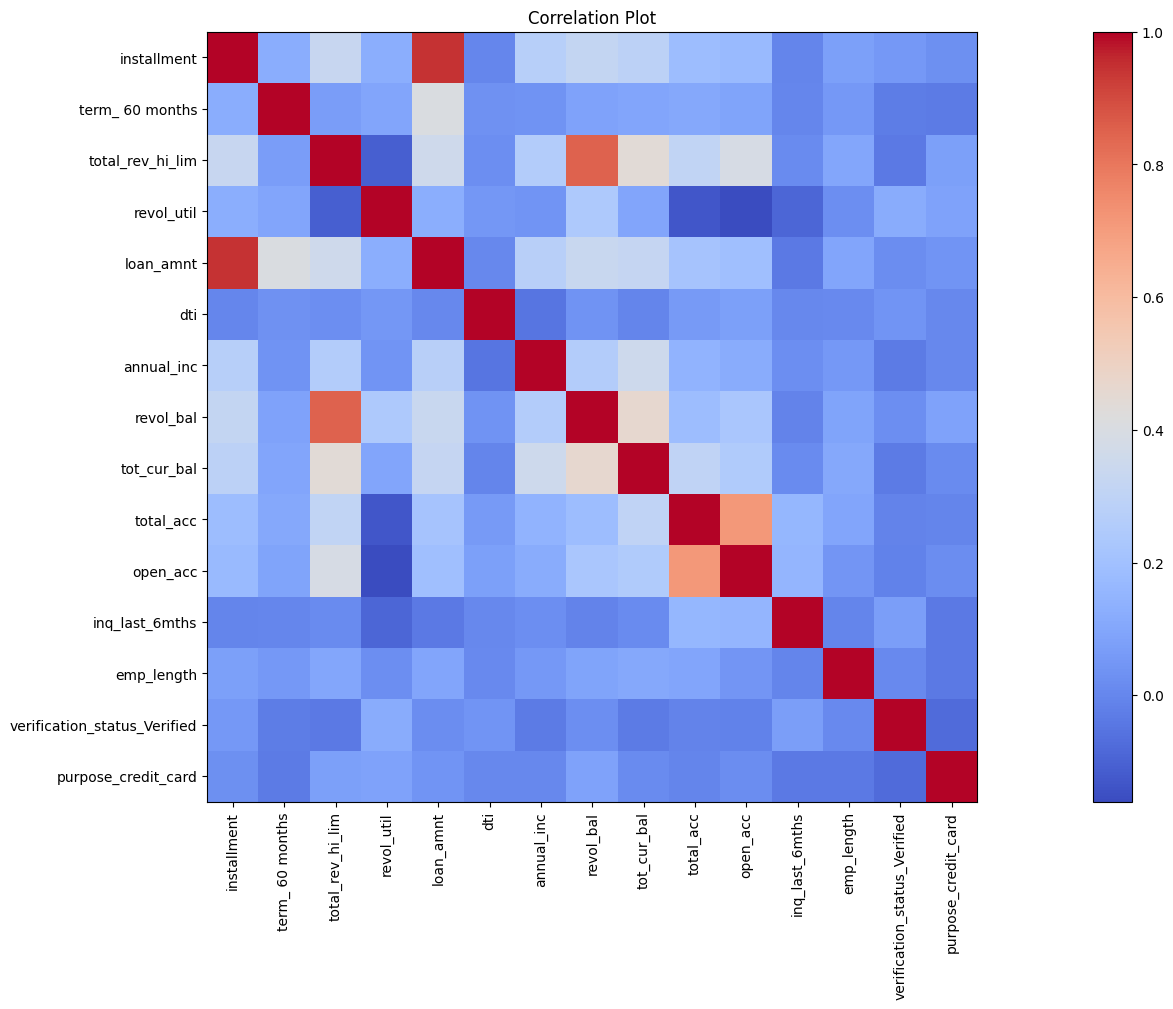

In [33]:
plt.figure(figsize=(30, 10))
correlation_matrix = df[feature_importances['feature'][:15]].corr()

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.title("Correlation Plot")
plt.show()

Σύμφωνα με το παραπάνω correlation matrix, παρατηρούμε ότι το "loan_amnt" έχει υψηλή συσχέτιση με το "installment" καθώς και το "revol_bal" με το "total_rev_hi_lim". Επίσης, υψηλή συσχέτιση έχουν και τα "open_acc" με το "total_acc".

### Επιλογή Χαρακτηριστικών με χαμηλό correlation

In [34]:
low_collerations= []

threshold_for_low_correlation= 0.6

for feature in correlation_matrix.columns:
    if all(correlation_matrix[feature][low_collerations] < threshold_for_low_correlation):
        low_collerations.append(feature)

low_collerations

['installment',
 'term_ 60 months',
 'total_rev_hi_lim',
 'revol_util',
 'dti',
 'annual_inc',
 'tot_cur_bal',
 'total_acc',
 'inq_last_6mths',
 'emp_length',
 'verification_status_Verified',
 'purpose_credit_card']

### Εκπαίδευση Random Forest με τα παραπάνω χαρακτηριστικά

In [35]:
df_features= df[low_collerations]
df_target= df['target']

x= df_features.to_numpy()
y= df_target.to_numpy()

seed= 0
test_size= 0.3

x_train, x_test, y_train, y_test= train_test_split(
    x, y, test_size= test_size, random_state= seed, stratify= y
    )

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((149099, 12), (149099,), (63900, 12), (63900,))

In [36]:
random_forest_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

random_forest_clf.fit(x_train, y_train)

y_pred= random_forest_clf.predict(x_test)

accuracy_of_random_forest= accuracy_score(y_test, y_pred)
precision_of_random_forest= precision_score(y_test, y_pred)
recall_of_random_forest= recall_score(y_test, y_pred)
f1_of_random_forest= f1_score(y_test, y_pred)

print("Accuracy of best estimator: ", accuracy_of_random_forest)
print("Precision of best estimator: ", precision_of_random_forest)
print("Recall of best estimator: ", recall_of_random_forest)
print("f1 of best estimator: ", f1_of_random_forest)

Accuracy of best estimator:  0.831377151799687
Precision of best estimator:  0.7484334203655353
Recall of best estimator:  0.6235927557513461
f1 of best estimator:  0.6803334618921886


## Πέμπτο Ερώτημα

### Εισαγωγή Δεδομένων

In [37]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

### Εφαρμογή Standar Scaling στα δεδομένα

Μετατροπή των εικόνων πρώτα σε διανύσματα

In [38]:
x_train_vector = x_train.reshape(len(x_train), 28*28)
x_test_vector = x_test.reshape(len(x_test), 28*28)

x_train_vector.shape, x_test_vector.shape

((60000, 784), (10000, 784))

In [39]:
scaler= StandardScaler()

x_train_scaled = scaler.fit_transform(x_train_vector)
x_test_scaled = scaler.transform(x_test_vector)

### Εφαρμογή PCA για μείωση χαρακτηριστικών

In [40]:
pca = PCA(n_components=300)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

Αν κάναμε fit_transform και στο train και στο test, τότε θα υπολογίζονταν διαφορετικές κύριες συνιστώσες για κάθε σετ. Για το συγκεκριμένο παράδειγμα θα επιλέγονταν 300 για το train set και 300 διαφορετικές για το test set. <br>
Αν πραγματοποιηθεί ένωση του train με το test, τότε το pca θα μάθαινε πληροφορία από το test set πριν γίνει η πρόβλεψη, με αποτέλεσμα να υπάρχει πλασματική μεγαλύτερη ακρίβεια, κάτι που οδηγεί σε λάθος

### Εκπαίδευση KNN

In [41]:
k_values= [5, 15, 51, 101]

for k in k_values:
  knn_clf= KNeighborsClassifier(n_neighbors= k, n_jobs= -1)
  knn_clf.fit(x_train_pca, y_train)

  y_pred= knn_clf.predict(x_test_pca)
  accuracy_of_knn= accuracy_score(y_test, y_pred)

  print("For k= ", k, ": accuracy= ", accuracy_of_knn)

For k=  5 : accuracy=  0.9497
For k=  15 : accuracy=  0.9436
For k=  51 : accuracy=  0.9273
For k=  101 : accuracy=  0.9158


### Εφαρμογή LDA

In [42]:
lda_clf= LDA(n_components= 2)
x_train_lda = lda_clf.fit_transform(x_train_scaled, y_train)
x_test_lda = lda_clf.transform(x_test_scaled)

### Δημιουργία 2D Scatter Plot

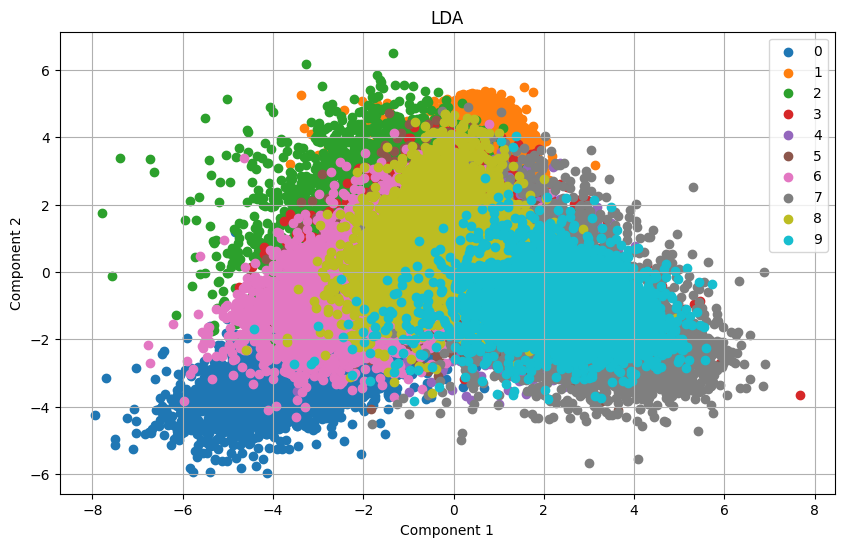

In [43]:
plt.figure(figsize=(10, 6))

for digit in range(10):
    idx = (y_train == digit)
    plt.scatter(
        x_train_lda[idx, 0],
        x_train_lda[idx, 1],
        label=str(digit)
    )

plt.title("LDA")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

### Χρήση Βιβλιοθήκης UMAP

In [44]:
umap_model = umap.UMAP(n_components=2, random_state=0)

x_train_umap = umap_model.fit_transform(x_train_scaled)
x_test_umap = umap_model.transform(x_test_scaled)

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


### Δημιουργία 2D Scatter Plot

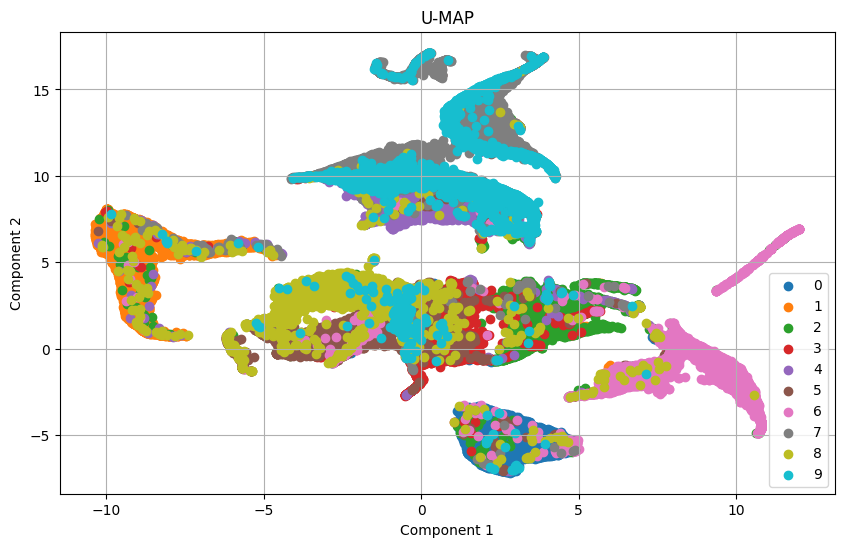

In [45]:
plt.figure(figsize=(10, 6))

for digit in range(10):
    idx = (y_train == digit)
    plt.scatter(
        x_train_umap[idx, 0],
        x_train_umap[idx, 1],
        label=str(digit)
    )

plt.title("U-MAP")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()
plt.grid(True)
plt.show()

Γίνεται εύκολα αντιληπτό ότι το UMAP δημιουργεί καλύτερα και πιο διακριτά clusters. Επίσης η αλληλοεπικάλυψη που υπήρχε στο LDA είναι αρκετά πιο μειωμένη